# Twitter Sentiment Analysis Project

## Introduction

This project is an analysis of the Human Rights Campaign (HRC) twitter. As explained in their twitter biography, 'HRC is the nation’s largest LGBTQ+ civil rights organization. We envision a world where LGBTQ+ people are ensured equality at home, at work & in every community'. The major holiday, National Coming Out Day, happens on 10/11/2021 so this analysis will focus on the past 100 tweets from this handle. (Note: This analysis was completed on 10/12/2021.) We should see more information that focuses on this important day for the LGBTQ+ community.

This project will complete a sentiment analysis to categorize if the tweets are more positive leaning or negative leaning. Polarity and Subjectivity will both play an important part in this analysis as well. Polarity is a metric scored on a -1 to 1 scale and categorizes the text from -1 (most negative) to 1 (most positive). Subjectivity is scored on a 0 to 1 scale and generally categorizes text from 0 (personal opinion, emotion or judgement) to 1 (objective, factual information).

In [1]:
#Import the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
#Twitter API credentials
log = pd.read_csv('Twitter Login Info.csv')
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [3]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [4]:
#Extract 100 tweet from the twitter user
posts = api.user_timeline(screen_name = "HRC", count=100, include_rts=False,tweet_mode= "extended")

#Print the last 5 tweets from the account
print(" Show the 5 recent tweet: |n")
i=1
for tweet in posts[0:5]:
    print(str(i) + ')'  + tweet.full_text + '\n')
    i = i + 1

 Show the 5 recent tweet: |n
1)Today is the last day to register to vote in Virginia, New Jersey, Kansas, and West Virginia! Voters in Maine or Minnesota, there are still options to register in person, but be sure to register for the Nov. 2 election! Visit https://t.co/JHpdNpaaIg to register &amp; make your plan! https://t.co/EjbwNhMIXg

2)🌈We can’t wrap up National #ComingOutDay without mentioning LGBTQ+ sexual health. The ability to come out &amp; speak openly with health care providers &amp; to your sexual partners, is key in taking control of your body, your sexuality &amp; ending HIV &amp; stigma.

3)Jon Gruden's anti-LGBTQ+, racist and misogynistic language puts a spotlight on a pervasive problem in pro sports. The @NFL must use this moment to double down on diversity efforts &amp; push to create an environment where all players, staff and fans feel welcomed and supported.

4)Today is the 23rd anniversary of Matthew Shepard’s death. He had spent six days on life support following

## Text Processing

In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,Today is the last day to register to vote in V...
1,🌈We can’t wrap up National #ComingOutDay witho...
2,"Jon Gruden's anti-LGBTQ+, racist and misogynis..."
3,Today is the 23rd anniversary of Matthew Shepa...
4,"As we celebrate #NationalComingOutDay, let’s w..."


In [6]:
df['Tweets'] = df['Tweets'].str.lower()
df
#lowercase all letters to make words uniform

,Tweets
0,today is the last day to register to vote in v...
1,🌈we can’t wrap up national #comingoutday witho...
2,"jon gruden's anti-lgbtq+, racist and misogynis..."
3,today is the 23rd anniversary of matthew shepa...
4,"as we celebrate #nationalcomingoutday, let’s w..."
...,...
81,the first-ever black in fashion index highligh...
82,rachel and frank gonzales are part of our pare...
83,#artistsforequality begins today! it’s an onli...
84,"this #latinxheritagemonth, wear your pride out..."


In [7]:
import string
from nltk.corpus import stopwords

In [8]:
#create a function to clean the tweets
def cleanTxt(text):
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*') #creates the pattern to move stop words
    text = pattern.sub('', text) #Removes stop words
    
    text = re.sub(r'@[A-Za-z0-9]+', '', text)#removes @ mentions
    text=re.sub(r'#', '', text) #removes hashtag
    text = re.sub(r"http\S+", "", text) #removes https info from tweet
    text=text.replace(" u..", " you ") #removes u and replaces it with you
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text=emoji_pattern.sub(r'', text)#removes emjois and symbols
    
    return text

#Clean the text
df['Tweets']=df['Tweets'].apply(cleanTxt)

In [9]:
df.head()

,Tweets
0,"today last day register vote virginia, new jer..."
1,’wrap national comingoutday without mentioning...
2,"jon gruden'anti-lgbtq+, racist misogynistic la..."
3,today 23rd anniversary matthew shepard’death. ...
4,"celebrate nationalcomingoutday, let’work toget..."


## Creating Subjectivity and Polarity Metrics

In [10]:
# Create a function to get the Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity']= df['Tweets'].apply(getSubjectivity) 
df['Polarity']= df['Tweets'].apply(getPolarity)

#Show the new dataframe
df

,Tweets,Subjectivity,Polarity
0,"today last day register vote virginia, new jer...",0.470034,0.317235
1,’wrap national comingoutday without mentioning...,0.791667,0.250000
2,"jon gruden'anti-lgbtq+, racist misogynistic la...",0.000000,0.000000
3,today 23rd anniversary matthew shepard’death. ...,0.525000,-0.425000
4,"celebrate nationalcomingoutday, let’work toget...",0.416667,0.266667
...,...,...,...
81,first-ever black fashion index highlights fash...,0.433333,-0.166667
82,rachel frank gonzales part parents transgender...,0.600000,0.362500
83,artistsforequality begins today! ’online art a...,0.000000,0.000000
84,"latinxheritagemonth, wear pride loud! ’exclusi...",0.650000,0.041667


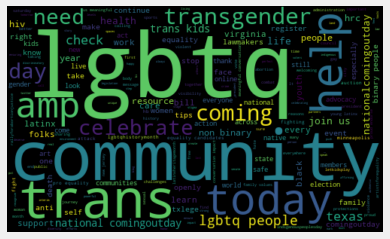

In [26]:
# Creating a Word Cloud
allwords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height=300, random_state = 35, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

By creating a word cloud, we can start to see some feature words that are important in these tweets. We can see national coming out day, community, support national coming out day, community, trans, lgbtq, help are all repeated words in this corpus. These words lean more 'positive' and make sense when we think about HRC as an organization.

In [12]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'

#Apply the function to the polarity column which is the score    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"today last day register vote virginia, new jer...",0.470034,0.317235,Positive
1,’wrap national comingoutday without mentioning...,0.791667,0.250000,Positive
2,"jon gruden'anti-lgbtq+, racist misogynistic la...",0.000000,0.000000,Neutral
3,today 23rd anniversary matthew shepard’death. ...,0.525000,-0.425000,Negative
4,"celebrate nationalcomingoutday, let’work toget...",0.416667,0.266667,Positive
...,...,...,...,...
81,first-ever black fashion index highlights fash...,0.433333,-0.166667,Negative
82,rachel frank gonzales part parents transgender...,0.600000,0.362500,Positive
83,artistsforequality begins today! ’online art a...,0.000000,0.000000,Neutral
84,"latinxheritagemonth, wear pride loud! ’exclusi...",0.650000,0.041667,Positive


In [27]:
# Print all of the postive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j= j+1
        
#we can see that 54 out of 100 tweets are positive

1) today last day register vote virginia, new jersey, kansas, west virginia! voters maine minnesota, still options register person, sure register nov. 2 election! visit  register &amp; make plan! 

2) ’wrap national comingoutday without mentioning lgbtq+ sexual health. ability come &amp; speak openly health care providers &amp; sexual partners, key taking control body, sexuality &amp; ending hiv &amp; stigma.

3) celebrate nationalcomingoutday, let’work together end discrimination lgbtq+ community ensure strong protections federal law. take action call senate pass equality act today.
 

4) deserve live life authentic self. nationalcomingoutday every day - ’. ❤️🧡 

5)  chooses put platform real consequences lgbtq+ people. lessons expense actual humans &amp; "commentary" causes real harm trans people, face record levels violence &amp; discriminatory legislation.


6) world famous athletes celebrities gracing silver screen, lot influential folks come past year encouraged others proud . na

In [28]:
# Print all of the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j= j+1
        
#we can see that 7 out of 100 tweets are negative

1) today 23rd anniversary matthew shepard’death. spent six days life support following violent anti-gay hate crime.

honor legacy calling policymakers levels act urgency addressing ongoing epidemic anti-lgbtq+ violence.

2) trailblazer racial justice gender equality, pauli murray subject new documentary called ‘name pauli murray.’  

3) onthisday 23 years ago, matthew shepard attacked laramie, wyoming, anti-gay hate crime. died injuries 6 days later.

memory,  remains vigilant work combat hate &amp; ensure one targeted .

4) kiér laprí kartier, black trans woman, fatally shot texas sept. 30, bringing total violent deaths trans gender non-conforming people year least 38, five happened texas. 


5) saddened learn death kiér laprí kartier, 21-year-old black transgender woman fatally shot arlington, texas september 30. death least 38th violent death trans gender non-conforming person year. 


6) last year, announced national partnership  combat hiv black latinx communities. wasted time get

In [29]:
# Print all of the Neutral tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j= j+1
        
#we can see that 25 out of 100 tweets are negative. 25% of tweets are neutral

1) jon gruden'anti-lgbtq+, racist misogynistic language puts spotlight pervasive problem pro sports.  must use moment double diversity efforts &amp; push create environment players, staff fans feel welcomed supported.

2) interim president _president spoke  history meaning nationalcomingoutday spotlighting efforts celebrate everyone’coming story today always. 

3) coming looks different everyone.

matter journey, tools help process.

nationalcomingoutday check resources navigating coming stage!  

4) today every day, celebrate cultures traditions native people recognize impact colonialism native communities. whose indigenous territory currently standing ? check native land app. indigenouspeoplesday 

5) ’born shine ’celebrating national comingoutday! whether ’living life openly still journey, know ’community support every step way.   

6) year covid-19 pandemic, nearly 75% lgbtq+ people report covid-19 harmed mental health. worldmentalhealthday ’sharing resources discussing importance 

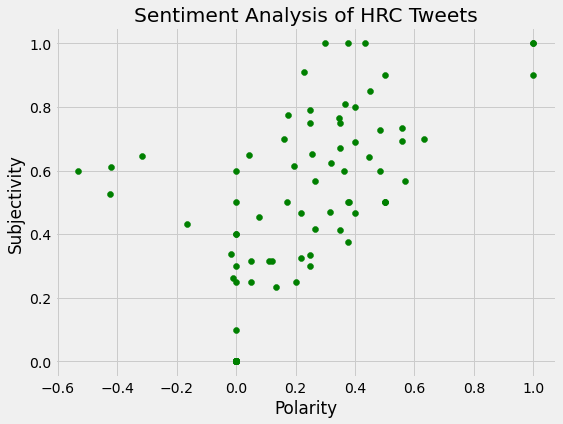

In [31]:
#Plot the polarity and sibjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green')
    
plt.title('Sentiment Analysis of HRC Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

This chart shows the intersection between polarity and subjectivity. Overall the tweets are primarily positive and seem to range on subjectivity versus factual information.

In [17]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets=ptweets['Tweets']

negtweets = df[df.Analysis == 'Negative']
negtweets=negtweets['Tweets']

In [18]:
#Percent of Positive Tweets
round( (ptweets.shape[0] / df.shape[0]) *100 , 1 )

62.8

In [19]:
#Percent of Negative Tweets
round( (negtweets.shape[0] / df.shape[0]) *100 , 1 )

8.1

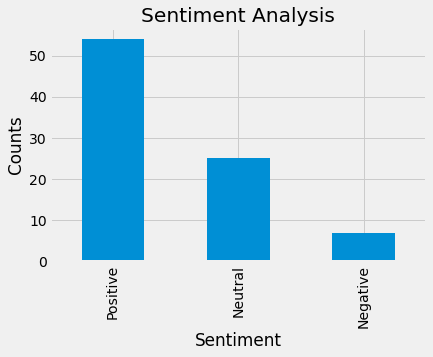

In [20]:
#Show the value counts
df['Analysis'].value_counts()

#plot the counts as bar chart
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

## Conclusion

We see that almost 63% of HRC's tweets are positive. Overall this organization focuses on the successes for the LGBQT+ community rather than the lack of progression in human rights issues. These tweets do tend to score on a range on subjectivity however. Based on the word cloud visual, we can see that 'National Coming Out Day' was heavily featured in the last 100 tweets for this organization as well.